## Análisis exploratorio de los datos

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
file_path = "combined_odds_cleaned.csv"
laliga_data_cleaned = pd.read_csv(file_path)

### Análisis general del dataset

- Número de partidos jugados cada temporada
- Número de equipos
- Número de partidos por equipo
- Información de resultados por equipo

#### Número de partidos jugados cada temporada


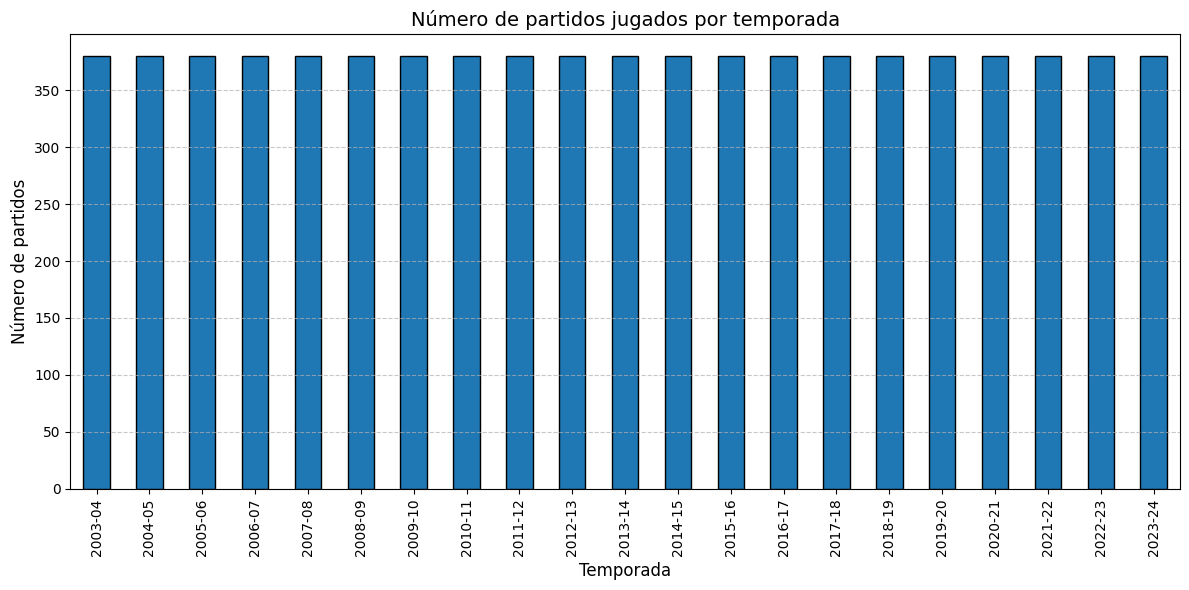

In [9]:
# Calculate the number of matches per season
matches_per_season = laliga_data_cleaned['Season'].value_counts().sort_index()

# Plot a bar chart
plt.figure(figsize=(12, 6))
matches_per_season.plot(kind='bar', edgecolor='black')
plt.title('Número de partidos jugados por temporada', fontsize=14)
plt.xlabel('Temporada', fontsize=12)
plt.ylabel('Número de partidos', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#### Número de equipos

In [10]:
# Count the unique teams in HomeTeam and AwayTeam columns
unique_teams = pd.concat([laliga_data_cleaned['HomeTeam'], laliga_data_cleaned['AwayTeam']]).nunique()

unique_teams


41

#### Número de partidos por equipo

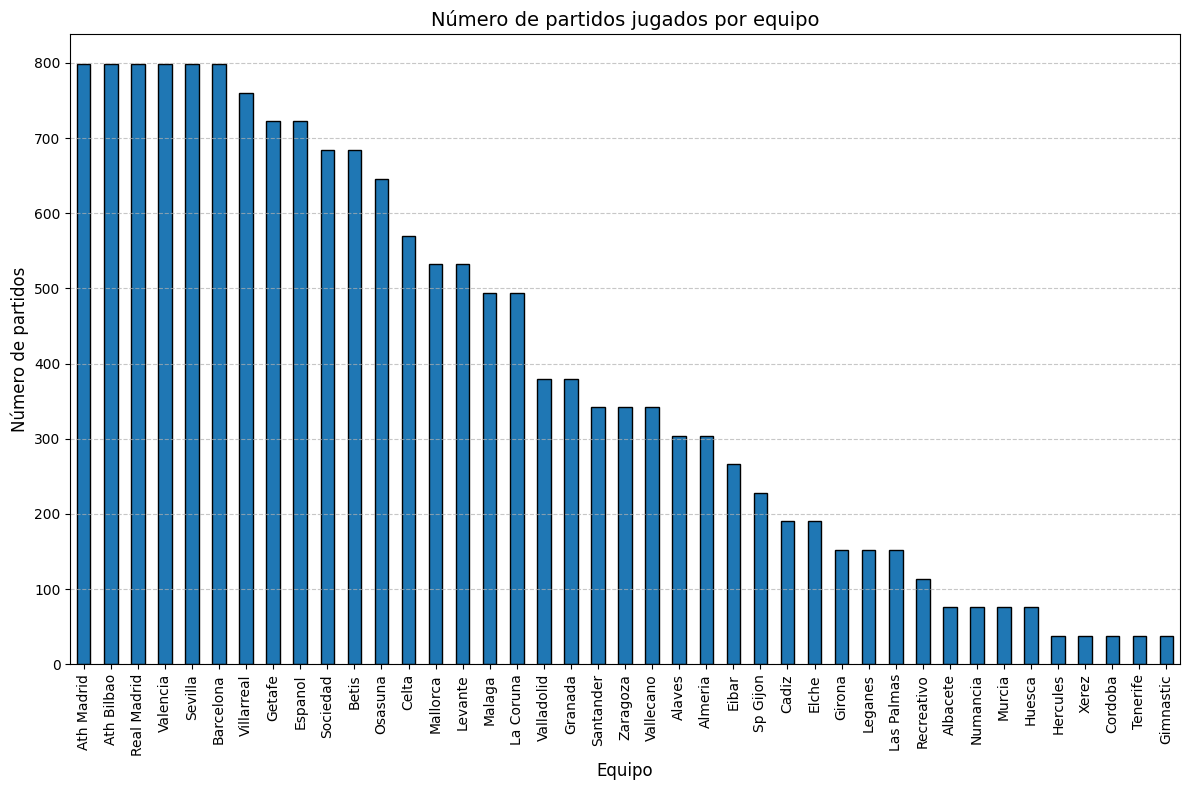

In [11]:
# Calculate the total matches played by each team
matches_per_team = (
    pd.concat([laliga_data_cleaned['HomeTeam'], laliga_data_cleaned['AwayTeam']])
    .value_counts()
    .sort_values(ascending=False)
)

# Plot a bar chart
plt.figure(figsize=(12, 8))
matches_per_team.plot(kind='bar', edgecolor='black')
plt.title('Número de partidos jugados por equipo', fontsize=14)
plt.xlabel('Equipo', fontsize=12)
plt.ylabel('Número de partidos', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#### Información de resultados por equipo

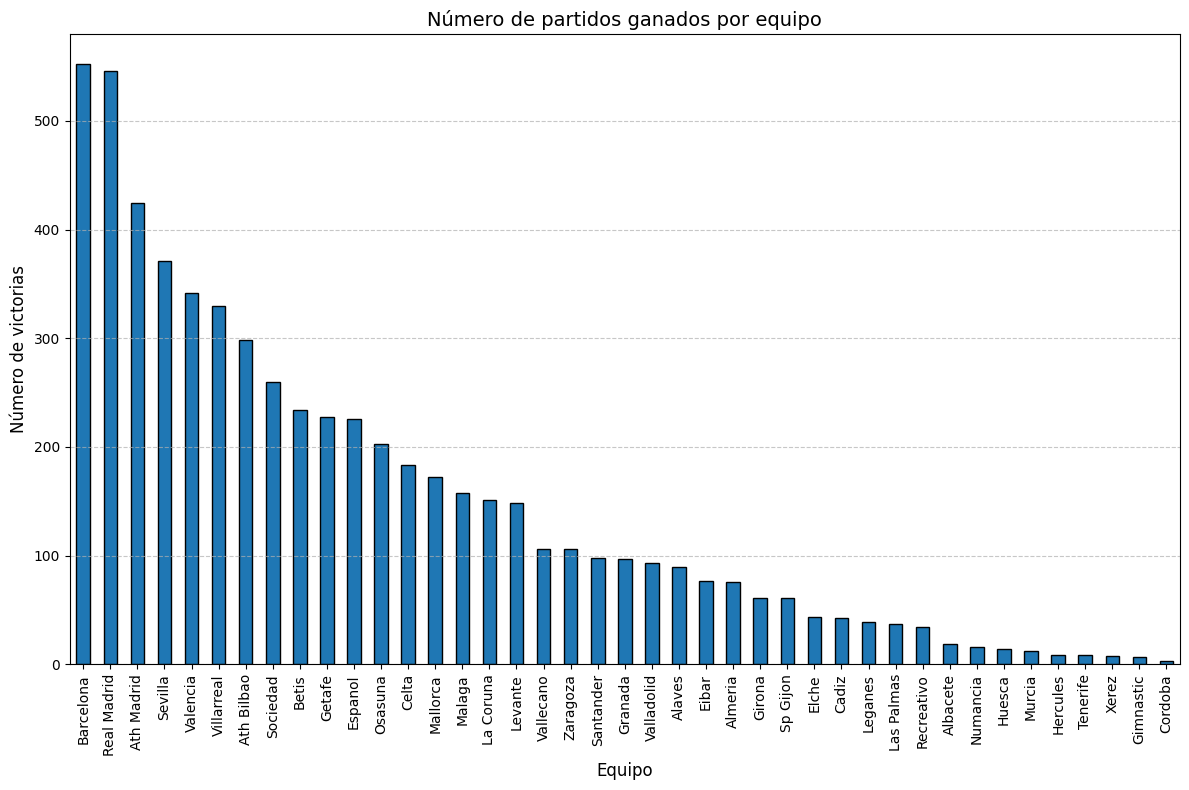

In [12]:
# Calculate the number of matches won by each team
matches_won = laliga_data_cleaned[laliga_data_cleaned['FTR'] == 'H']['HomeTeam'].value_counts() + \
              laliga_data_cleaned[laliga_data_cleaned['FTR'] == 'A']['AwayTeam'].value_counts()

# Fill NaN values with 0 for teams with no wins
matches_won = matches_won.fillna(0).sort_values(ascending=False)

# Plot a bar chart
plt.figure(figsize=(12, 8))
matches_won.plot(kind='bar', edgecolor='black')
plt.title('Número de partidos ganados por equipo', fontsize=14)
plt.xlabel('Equipo', fontsize=12)
plt.ylabel('Número de victorias', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Clasificación por temporadas

In [13]:
# Cargar el dataset
file_path = "combined_odds_cleaned.csv"
df = pd.read_csv(file_path)

df.rename(columns={'FTHG': 'HomeGoals', 'FTAG': 'AwayGoals'}, inplace=True)

In [14]:
df

,Date,Season,HomeTeam,AwayTeam,HomeGoals,AwayGoals,FTR,AvgH,AvgD,AvgA,Avg>2.5,Avg<2.5,AvgAHH,AvgAHA
0,2003-08-30,2003-04,Albacete,Osasuna,0,2,A,2.21,3.06,2.99,2.00,1.72,2.05,1.80
1,2003-08-30,2003-04,Ath Bilbao,Barcelona,0,1,A,2.64,3.13,2.42,1.76,1.95,1.77,2.08
2,2003-08-30,2003-04,Espanol,Sociedad,1,1,D,2.58,3.10,2.48,1.78,1.92,1.87,1.98
3,2003-08-30,2003-04,Malaga,Villarreal,0,0,D,2.27,3.08,2.88,1.95,1.76,2.07,1.78
4,2003-08-30,2003-04,Real Madrid,Betis,2,1,H,1.38,4.00,7.18,1.56,2.28,1.94,1.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7975,2024-05-25,2023-24,Real Madrid,Betis,0,0,D,5.90,2.30,6.03,1.38,3.14,2.00,1.89
7976,2024-05-26,2023-24,Getafe,Mallorca,1,2,A,3.01,2.51,3.25,2.33,1.63,2.01,1.88
7977,2024-05-26,2023-24,Celta,Valencia,2,2,D,3.36,2.27,3.59,1.95,1.92,1.97,1.92
7978,2024-05-26,2023-24,Las Palmas,Alaves,1,1,D,2.75,2.63,3.28,2.15,1.74,1.81,2.09


In [ ]:
import pandas as pd

# Función para calcular la clasificación por temporada
def calculate_standings(season_df):
    teams = set(season_df['HomeTeam']).union(set(season_df['AwayTeam']))
    standings = {team: {'Points': 0, 'GD': 0, 'GF': 0, 'GA': 0, 'Matches': 0} for team in teams}

    for _, row in season_df.iterrows():
        home_team, away_team = row['HomeTeam'], row['AwayTeam']
        home_goals, away_goals = row['HomeGoals'], row['AwayGoals']

        # Actualizar goles y partidos jugados
        standings[home_team]['GF'] += home_goals
        standings[home_team]['GA'] += away_goals
        standings[home_team]['GD'] += (home_goals - away_goals)
        standings[home_team]['Matches'] += 1

        standings[away_team]['GF'] += away_goals
        standings[away_team]['GA'] += home_goals
        standings[away_team]['GD'] += (away_goals - home_goals)
        standings[away_team]['Matches'] += 1

        # Asignar puntos
        if home_goals > away_goals:
            standings[home_team]['Points'] += 3
        elif home_goals < away_goals:
            standings[away_team]['Points'] += 3
        else:
            standings[home_team]['Points'] += 1
            standings[away_team]['Points'] += 1

    # Convertir a DataFrame
    standings_df = pd.DataFrame.from_dict(standings, orient='index')
    standings_df = standings_df.sort_values(by=['Points', 'GD', 'GF'], ascending=[False, False, False])
    standings_df['Position'] = range(1, len(standings_df) + 1)

    return standings_df

# Crear una estructura para almacenar la clasificación por temporada
season_standings = {}

# Separar el dataset por temporada y calcular la clasificación
for season, season_df in df.groupby('Season'):
    season_standings[season] = calculate_standings(season_df)

# Crear una lista para almacenar todos los datos de clasificación
classification_data = []

# Recorrer todas las temporadas y extraer la información
for season, standings_df in season_standings.items():
    # Agregar una columna de temporada
    standings_df['season'] = season
    
    # Resetear el índice para convertirlo en una columna normal
    standings_df = standings_df.reset_index()

    # Renombrar las columnas
    standings_df.columns = ['team', 'points', 'GD', 'GF', 'GA', 'num_matches', 'position', 'season']

    # Reordenar las columnas para que coincidan con el formato deseado
    standings_df = standings_df[['season', 'position', 'team', 'points', 'GD', 'GF', 'GA', 'num_matches']]
    
    # Convertir a lista de diccionarios y añadir a la lista principal
    classification_data.extend(standings_df.to_dict('records'))

# Crear un DataFrame final con toda la información de clasificaciones
classification_df = pd.DataFrame(classification_data)

# Guardar en un archivo CSV
classification_df.to_csv('clasificaciones.csv', index=False)

print("Los datos de clasificación se han guardado en 'clasificaciones.csv'")


Los datos de clasificación se han guardado en 'clasificaciones.csv'


In [30]:

# Filtrar la clasificación para la temporada 2023-24
season_2324_standings = season_standings.get('2023-24')

# Si la temporada 2023-24 existe, mostrarla
if season_2324_standings is not None:
    print("Clasificación de la temporada 2023-24:")
    print(season_2324_standings[['Position', 'Points', 'GD', 'GF', 'GA', 'Matches']])
else:
    print("No se encontró datos para la temporada 2023-24.")

Clasificación de la temporada 2023-24:
             Position  Points  GD  GF  GA  Matches
Real Madrid         1      95  61  87  26       38
Barcelona           2      85  35  79  44       38
Girona              3      81  39  85  46       38
Ath Madrid          4      76  27  70  43       38
Ath Bilbao          5      68  24  61  37       38
Sociedad            6      60  12  51  39       38
Betis               7      57   3  48  45       38
Villarreal          8      53   0  65  65       38
Valencia            9      49  -5  40  45       38
Alaves             10      46 -10  36  46       38
Osasuna            11      45 -11  45  56       38
Getafe             12      43 -12  42  54       38
Sevilla            13      41  -6  48  54       38
Celta              14      41 -11  46  57       38
Mallorca           15      40 -11  33  44       38
Las Palmas         16      40 -14  33  47       38
Vallecano          17      38 -19  29  48       38
Cadiz              18      33 -29  26  55  

### Análisis exploratorio de las estadísticas de partido

Distribución de goles por partido
1. Histograma de frecuencia de goles por partido
2. Diagrama de cajas de la distribución de goles por partido

Evolución de la cantidad de goles a lo largo de las temporadas
1. Gráfico de líneas: Promedio de goles por partido por temporada

Comparación de goles entre equipos
1. Gráfico de barras: Equipos con más goles en cada temporada
2. Diagrama de dispersión: Goles a favor vs. Goles en contra

Análisis del rendimiento en casa vs. fuera
1. Gráfico de barras apiladas: Porcentaje de victorias, empates y derrotas en casa y fuera
2. Promedio de Goles Anotados en Casa vs. Fuera
3. Correlación entre jugar en casa y ganar partidos
4. Heatmap de Correlación: Goles y Victoria

Variabilidad del rendimiento de los equipos entre temporadas
1. Boxplot: Variabilidad en la posición final de los equipos
2. Heatmap: Cambios de rendimiento entre temporadas
3. Gráfico de dispersión: Correlación entre posiciones en temporadas consecutivas
4. Histograma: Distribución de cambios de posición entre temporadas
5. Cambio medio de posición en temporadas consecutivas




##### Distribución de goles por partido
1. Histograma: Frecuencia de goles por partido

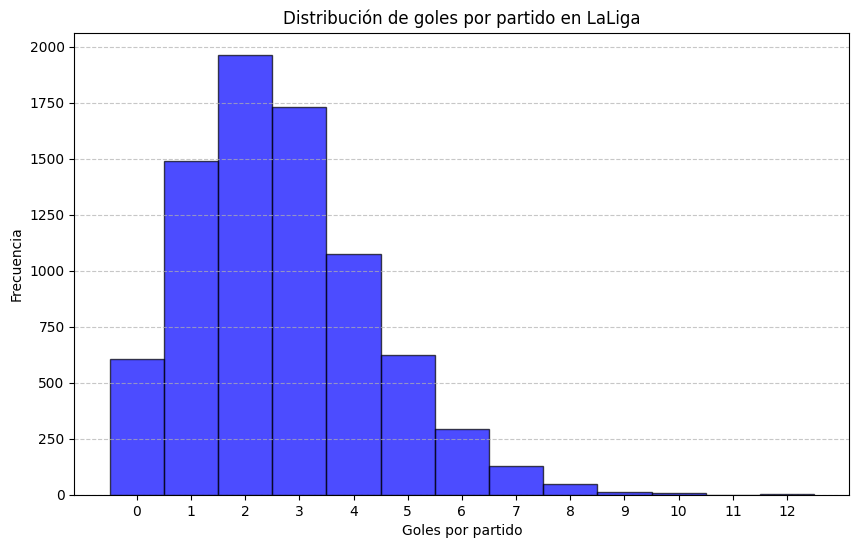

In [33]:
# Calcular los goles totales por partido
df['TotalGoals'] = df['HomeGoals'] + df['AwayGoals']

# Definir los bins manualmente
bins = np.arange(df['TotalGoals'].min(), df['TotalGoals'].max() + 1.5) - 0.5  # Para asegurar que cada número entero tenga su barra

# Crear el histograma corregido
plt.figure(figsize=(10,6))
plt.hist(df['TotalGoals'], bins=bins, color="blue", edgecolor="black", alpha=0.7)
plt.xticks(np.arange(df['TotalGoals'].min(), df['TotalGoals'].max() + 1))  # Asegurar que todos los valores tengan una marca en el eje x
plt.xlabel("Goles por partido")
plt.ylabel("Frecuencia")
plt.title("Distribución de goles por partido en LaLiga")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

2. Boxplot (diagrama de cajas) de la distribución de goles por partido

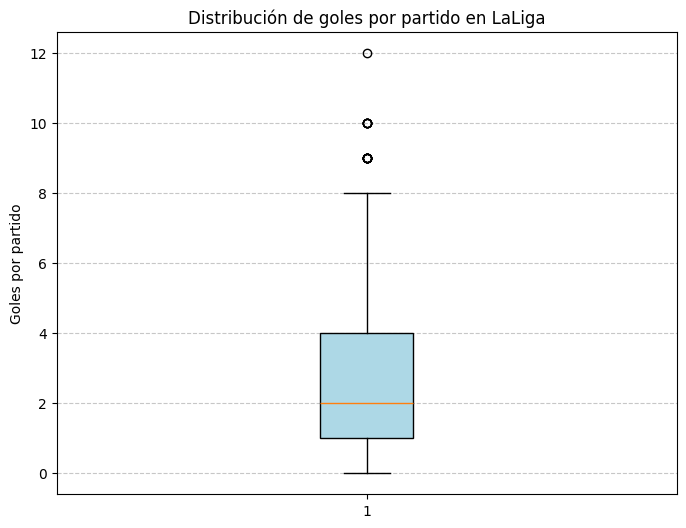

In [34]:
# Crear el boxplot de la distribución de goles por partido
plt.figure(figsize=(8,6))
plt.boxplot(df['TotalGoals'], vert=True, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.ylabel("Goles por partido")
plt.title("Distribución de goles por partido en LaLiga")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### Evolución de la cantidad de goles a lo largo de las temporadas
1. Gráfico de líneas: Promedio de goles por partido por temporada

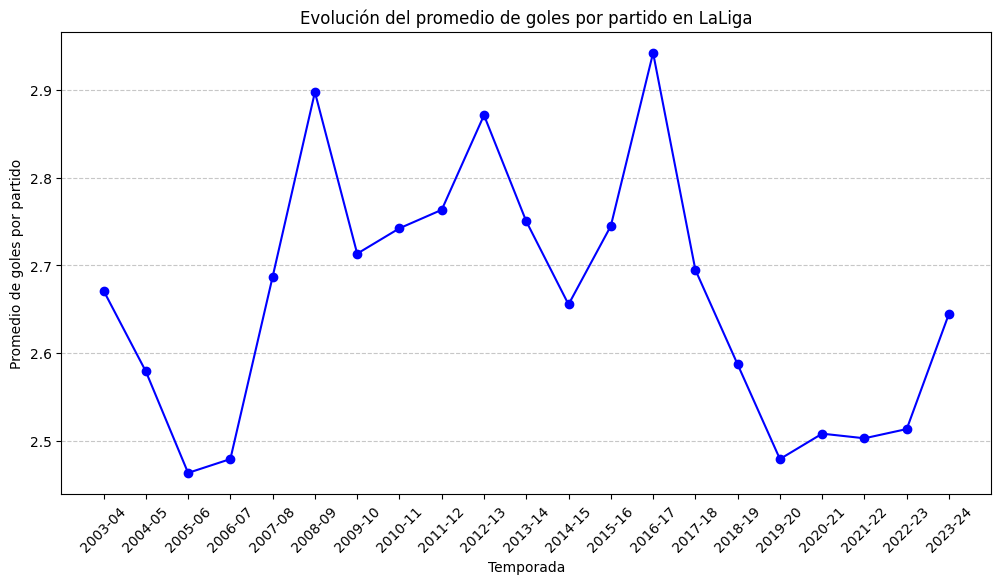

In [35]:
# Calcular el promedio de goles por partido en cada temporada
goals_per_season = df.groupby('Season')['TotalGoals'].mean()

# Crear el gráfico de líneas
plt.figure(figsize=(12,6))
plt.plot(goals_per_season.index, goals_per_season.values, marker='o', linestyle='-', color='blue')
plt.xlabel("Temporada")
plt.ylabel("Promedio de goles por partido")
plt.title("Evolución del promedio de goles por partido en LaLiga")
plt.xticks(rotation=45)  # Rotar etiquetas del eje X para mejor visibilidad
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Comparación de goles entre equipos
1. Gráfico de barras: Equipos con más goles en cada temporada

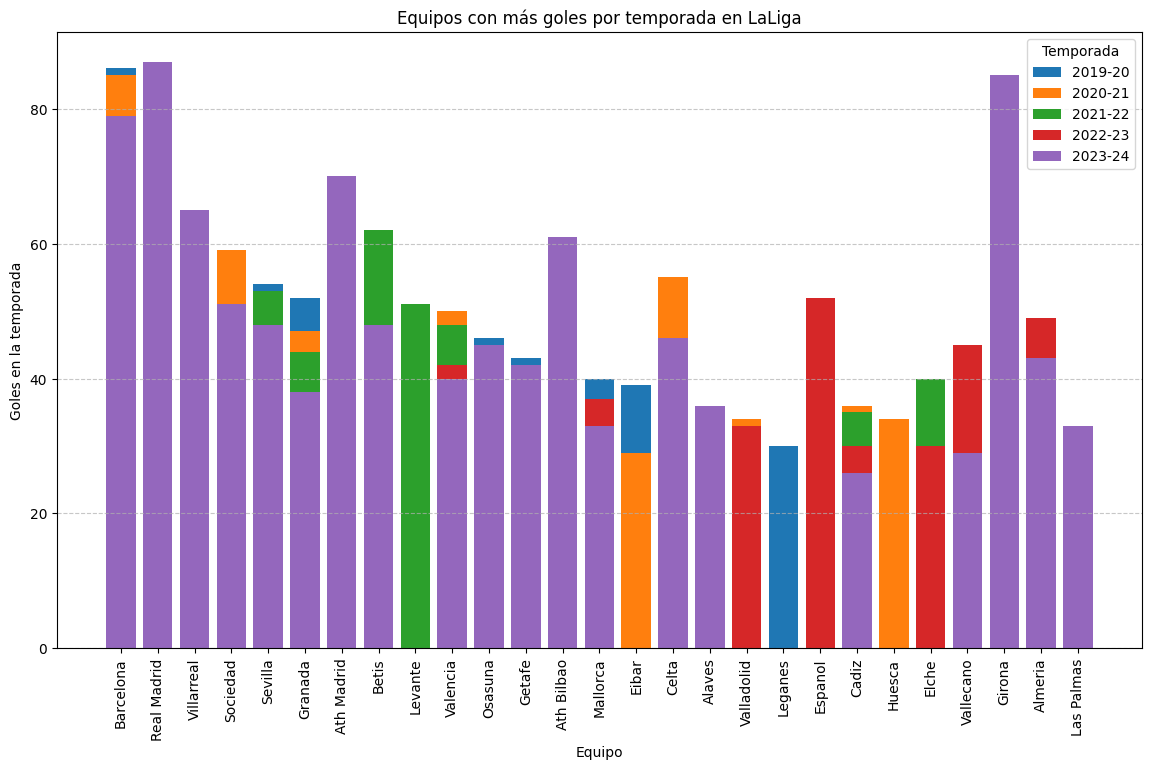

In [36]:
# Calcular los goles a favor por equipo en cada temporada
team_goals_per_season = df.groupby(['Season', 'HomeTeam'])['HomeGoals'].sum() + df.groupby(['Season', 'AwayTeam'])['AwayGoals'].sum()

# Tomar solo las últimas 5 temporadas para mejor visualización
latest_seasons = sorted(df['Season'].unique())[-5:]
team_goals_per_season = team_goals_per_season.loc[latest_seasons]

# Crear el gráfico de barras para los equipos con más goles en cada temporada
plt.figure(figsize=(14,8))
for season in latest_seasons:
    season_data = team_goals_per_season.loc[season].sort_values(ascending=False)
    plt.bar(season_data.index, season_data.values, label=season)

plt.xlabel("Equipo")
plt.ylabel("Goles en la temporada")
plt.title("Equipos con más goles por temporada en LaLiga")
plt.xticks(rotation=90)  # Rotar nombres de equipos para mejor visibilidad
plt.legend(title="Temporada")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

2. Diagrama de dispersión: Goles a favor vs. Goles en contra

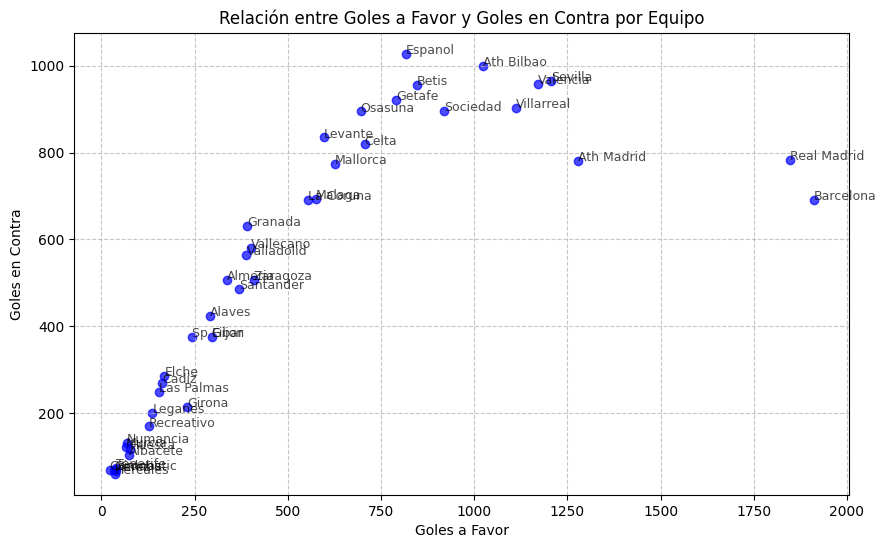

In [37]:
# Calcular los goles a favor y en contra por equipo en todas las temporadas
team_stats = df.groupby('HomeTeam').agg({'HomeGoals': 'sum', 'AwayGoals': 'sum'})
team_stats['TotalGoalsFor'] = team_stats['HomeGoals'] + df.groupby('AwayTeam')['AwayGoals'].sum()
team_stats['TotalGoalsAgainst'] = df.groupby('HomeTeam')['AwayGoals'].sum() + df.groupby('AwayTeam')['HomeGoals'].sum()

# Crear el diagrama de dispersión
plt.figure(figsize=(10,6))
plt.scatter(team_stats['TotalGoalsFor'], team_stats['TotalGoalsAgainst'], color="blue", alpha=0.7)
plt.xlabel("Goles a Favor")
plt.ylabel("Goles en Contra")
plt.title("Relación entre Goles a Favor y Goles en Contra por Equipo")
plt.grid(True, linestyle='--', alpha=0.7)

# Etiquetar algunos equipos en el gráfico
for team, row in team_stats.iterrows():
    plt.text(row['TotalGoalsFor'], row['TotalGoalsAgainst'], team, fontsize=9, alpha=0.7)

plt.show()

#### Análisis del rendimiento en casa vs. fuera
1. Gráfico de barras apiladas: Porcentaje de victorias, empates y derrotas en casa y fuera

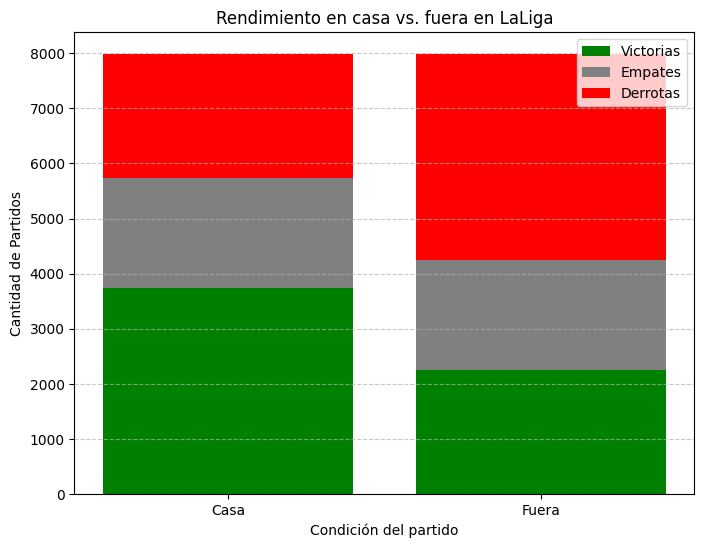

In [ ]:
# Contar partidos ganados, empatados y perdidos en casa
home_wins = (df['HomeGoals'] > df['AwayGoals']).sum()
home_draws = (df['HomeGoals'] == df['AwayGoals']).sum()
home_losses = (df['HomeGoals'] < df['AwayGoals']).sum()

# Contar partidos ganados, empatados y perdidos fuera
away_wins = (df['AwayGoals'] > df['HomeGoals']).sum()
away_draws = (df['AwayGoals'] == df['HomeGoals']).sum()
away_losses = (df['AwayGoals'] < df['HomeGoals']).sum()

# Datos para el gráfico
labels = ["Casa", "Fuera"]
wins = [home_wins, away_wins]
draws = [home_draws, away_draws]
losses = [home_losses, away_losses]

# Crear el gráfico de barras apiladas
plt.figure(figsize=(8,6))
bar_width = 0.5
bar1 = np.arange(len(labels))

plt.bar(bar1, wins, color='green', label="Victorias")
plt.bar(bar1, draws, bottom=wins, color='gray', label="Empates")
plt.bar(bar1, losses, bottom=np.array(wins) + np.array(draws), color='red', label="Derrotas")

plt.xticks(bar1, labels)
plt.xlabel("Condición del partido")
plt.ylabel("Cantidad de Partidos")
plt.title("Rendimiento en casa vs. fuera en LaLiga")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

2. Promedio de Goles Anotados en Casa vs. Fuera

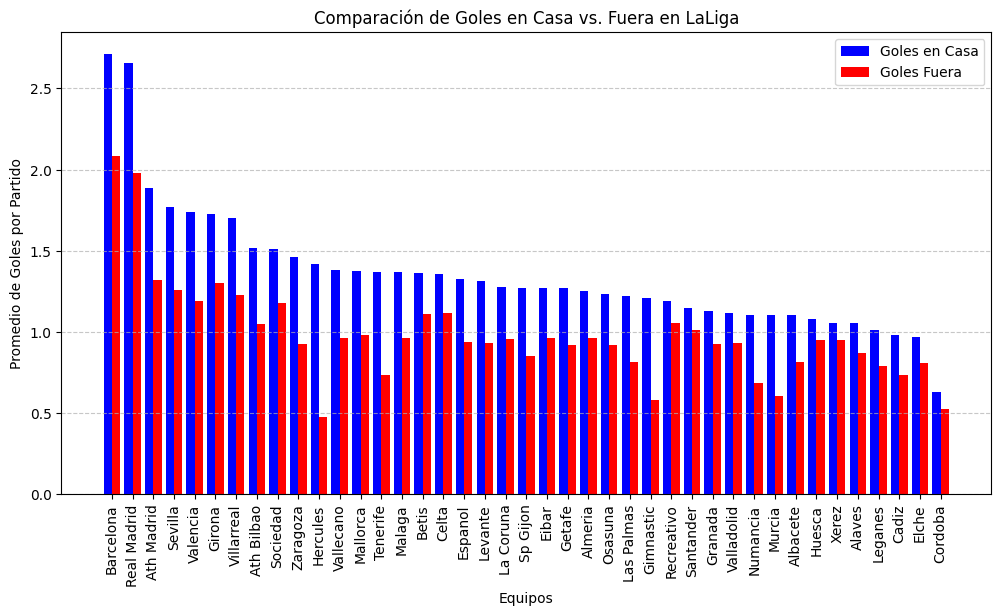

In [39]:
# Calcular el promedio de goles anotados en casa y fuera por cada equipo
home_goals_avg = df.groupby('HomeTeam')['HomeGoals'].mean()
away_goals_avg = df.groupby('AwayTeam')['AwayGoals'].mean()

# Unir en un DataFrame para comparación
goals_comparison = pd.DataFrame({'Goles en Casa': home_goals_avg, 'Goles Fuera': away_goals_avg})
goals_comparison = goals_comparison.sort_values(by='Goles en Casa', ascending=False)

# Crear el gráfico de comparación
bar_width = 0.4
indices = np.arange(len(goals_comparison))

plt.figure(figsize=(12,6))
plt.bar(indices - bar_width/2, goals_comparison['Goles en Casa'], width=bar_width, color='blue', label="Goles en Casa")
plt.bar(indices + bar_width/2, goals_comparison['Goles Fuera'], width=bar_width, color='red', label="Goles Fuera")

plt.xlabel("Equipos")
plt.ylabel("Promedio de Goles por Partido")
plt.title("Comparación de Goles en Casa vs. Fuera en LaLiga")
plt.xticks(indices, goals_comparison.index, rotation=90)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


3. Correlación entre jugar en casa y ganar partidos

C:\Users\anaig\AppData\Local\Temp\ipykernel_4636\3443276063.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  home_wins_pct = df.groupby('HomeTeam').apply(lambda x: (x['HomeGoals'] > x['AwayGoals']).sum() / len(x) * 100)
C:\Users\anaig\AppData\Local\Temp\ipykernel_4636\3443276063.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  away_wins_pct = df.groupby('AwayTeam').apply(lambda x: (x['AwayGoals'] > x[

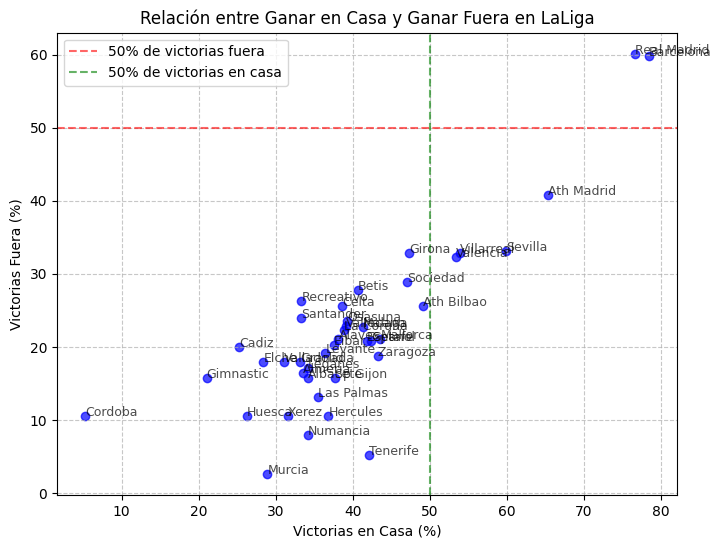

In [ ]:
# Calcular porcentaje de victorias en casa y fuera para cada equipo
home_wins_pct = df.groupby('HomeTeam').apply(lambda x: (x['HomeGoals'] > x['AwayGoals']).sum() / len(x) * 100)
away_wins_pct = df.groupby('AwayTeam').apply(lambda x: (x['AwayGoals'] > x['HomeGoals']).sum() / len(x) * 100)

# Unir en un DataFrame
win_correlation = pd.DataFrame({'Victorias en Casa (%)': home_wins_pct, 'Victorias Fuera (%)': away_wins_pct})

# Crear el gráfico de dispersión
plt.figure(figsize=(8,6))
plt.scatter(win_correlation['Victorias en Casa (%)'], win_correlation['Victorias Fuera (%)'], color='blue', alpha=0.7)
plt.xlabel("Victorias en Casa (%)")
plt.ylabel("Victorias Fuera (%)")
plt.title("Relación entre Ganar en Casa y Ganar Fuera en LaLiga")
plt.axhline(y=50, color='red', linestyle='--', alpha=0.6, label="50% de victorias fuera")  # Línea de referencia
plt.axvline(x=50, color='green', linestyle='--', alpha=0.6, label="50% de victorias en casa")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Etiquetar algunos equipos en el gráfico
for team, row in win_correlation.iterrows():
    plt.text(row['Victorias en Casa (%)'], row['Victorias Fuera (%)'], team, fontsize=9, alpha=0.7)

plt.show()


4. Heatmap de Correlación: Goles y Victoria

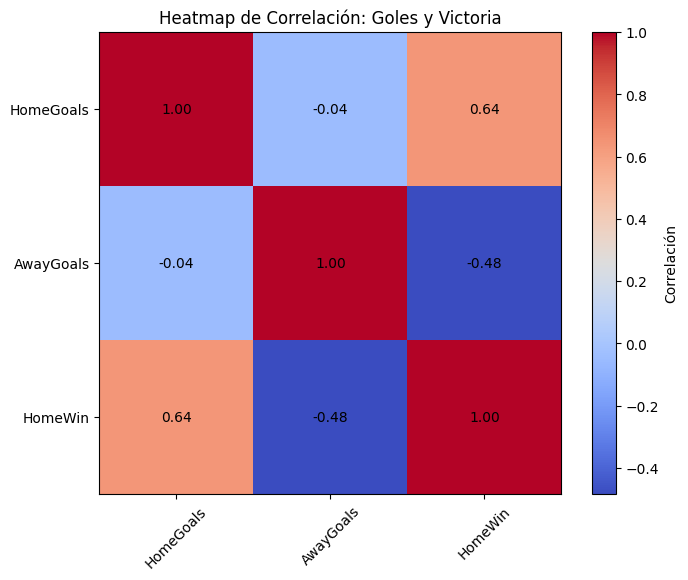

In [41]:
# Crear una nueva columna que indique si el equipo local ganó (1) o no (0)
df['HomeWin'] = (df['HomeGoals'] > df['AwayGoals']).astype(int)

# Seleccionar variables relevantes para la correlación
correlation_data = df[['HomeGoals', 'AwayGoals', 'HomeWin']]

# Calcular la matriz de correlación
correlation_matrix = correlation_data.corr()

# Crear el heatmap sin HomeGame
plt.figure(figsize=(8,6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label="Correlación")

# Agregar etiquetas
labels = correlation_matrix.columns
plt.xticks(np.arange(len(labels)), labels, rotation=45)
plt.yticks(np.arange(len(labels)), labels)

# Agregar valores numéricos dentro del heatmap
for i in range(len(labels)):
    for j in range(len(labels)):
        plt.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}", ha='center', va='center', color='black')

plt.title("Heatmap de Correlación: Goles y Victoria")
plt.show()


#### Variabilidad del rendimiento de los equipos entre temporadas
1. Boxplot: Variabilidad en la posición final de los equipos

C:\Users\anaig\AppData\Local\Temp\ipykernel_4636\3379053776.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([team_positions_df[team].dropna() for team in team_positions_df.columns], labels=team_positions_df.columns, vert=True)


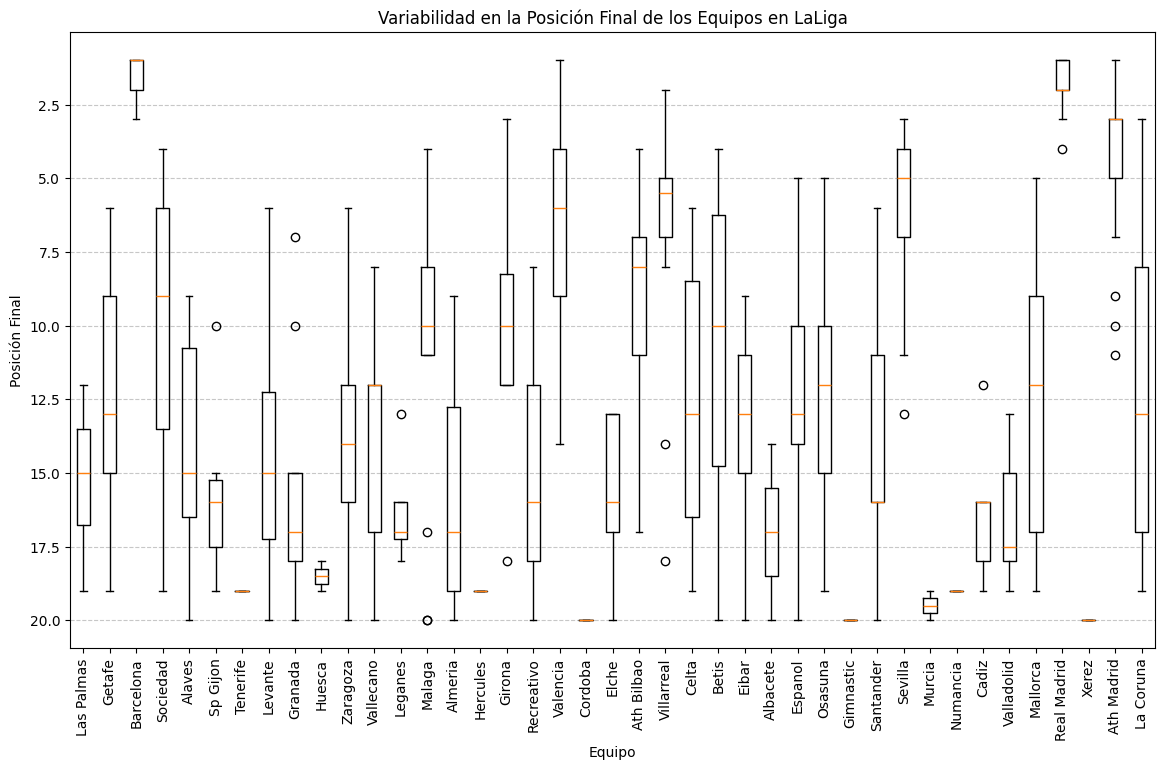

In [43]:
# Crear un diccionario con las posiciones finales por equipo en todas las temporadas
team_positions_dict = {team: [] for team in set(team for standings in season_standings.values() for team in standings.index)}

# Rellenar el diccionario con las posiciones finales de cada equipo por temporada
for season, standings in season_standings.items():
    for team in team_positions_dict.keys():
        if team in standings.index:
            team_positions_dict[team].append(standings.loc[team, 'Position'])
        else:
            team_positions_dict[team].append(None)  # Si el equipo no jugó esa temporada

# Convertir en un DataFrame para facilitar la visualización
team_positions_df = pd.DataFrame.from_dict(team_positions_dict, orient='index').T

# Crear el boxplot
plt.figure(figsize=(14,8))
plt.boxplot([team_positions_df[team].dropna() for team in team_positions_df.columns], labels=team_positions_df.columns, vert=True)
plt.gca().invert_yaxis()  # Invertir el eje Y para que el 1° lugar esté arriba
plt.xlabel("Equipo")
plt.ylabel("Posición Final")
plt.title("Variabilidad en la Posición Final de los Equipos en LaLiga")
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


2. Heatmap: Cambios de rendimiento entre temporadas

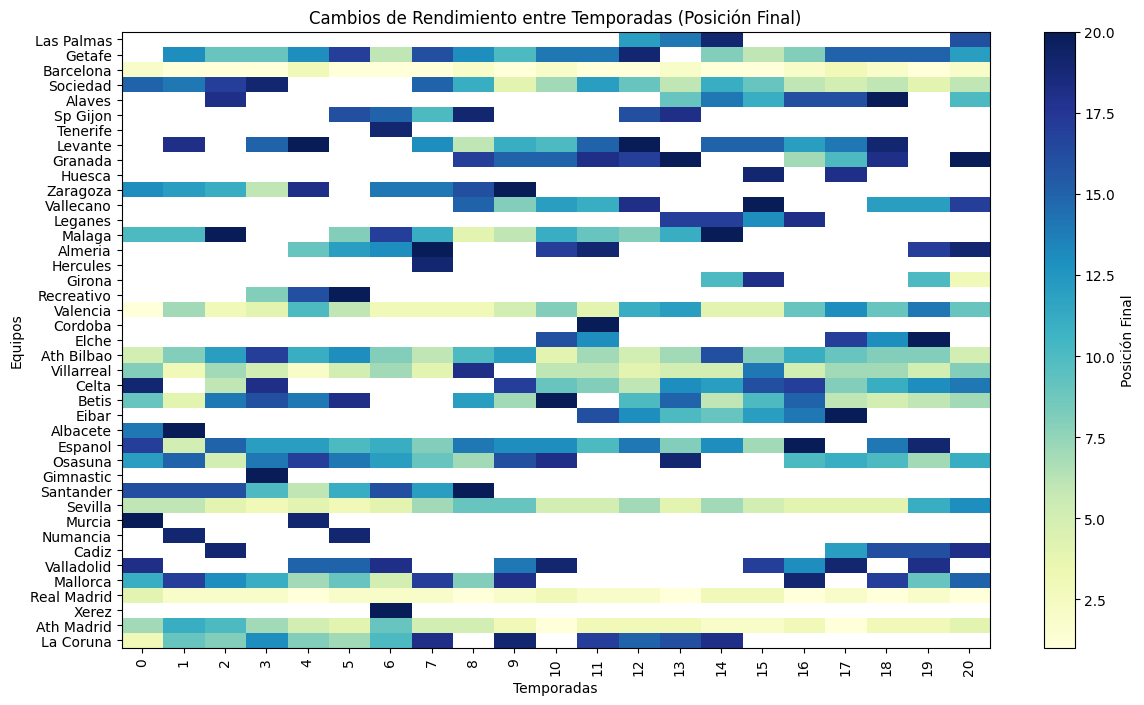

In [44]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Crear un diccionario con las posiciones finales por equipo en todas las temporadas
team_positions_dict = {team: [] for team in set(team for standings in season_standings.values() for team in standings.index)}

# Rellenar el diccionario con las posiciones finales de cada equipo por temporada
for season, standings in season_standings.items():
    for team in team_positions_dict.keys():
        if team in standings.index:
            team_positions_dict[team].append(standings.loc[team, 'Position'])
        else:
            team_positions_dict[team].append(np.nan)  # Si el equipo no jugó esa temporada

# Convertir en un DataFrame para facilitar la visualización
team_positions_df = pd.DataFrame.from_dict(team_positions_dict, orient='index')

# Crear un gráfico de calor
plt.figure(figsize=(14, 8))

# Dibujar el heatmap
plt.imshow(team_positions_df, cmap='YlGnBu', aspect='auto', interpolation='nearest')

# Configuración de los ejes
plt.xticks(range(len(team_positions_df.columns)), team_positions_df.columns, rotation=90)
plt.yticks(range(len(team_positions_df.index)), team_positions_df.index)

# Añadir etiquetas y título
plt.xlabel('Temporadas')
plt.ylabel('Equipos')
plt.title('Cambios de Rendimiento entre Temporadas (Posición Final)')

# Añadir barra de color
plt.colorbar(label='Posición Final')

# Mostrar el gráfico
plt.show()


3. Gráfico de dispersión: Correlación entre posiciones en temporadas consecutivas


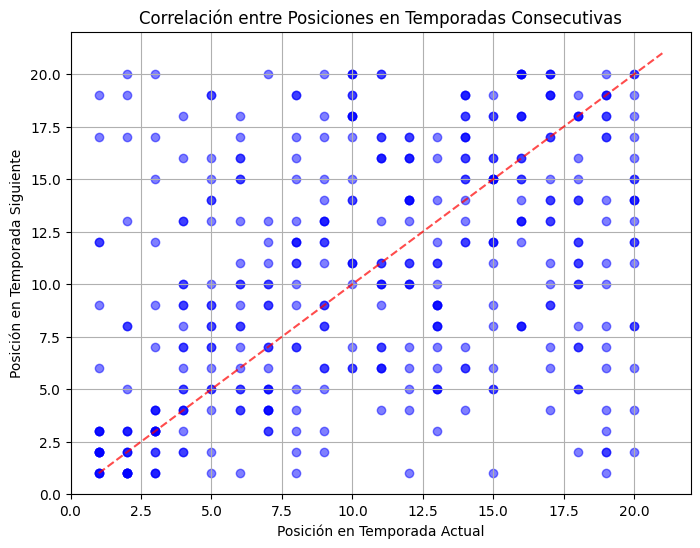

In [55]:

# Crear un diccionario con las posiciones finales por equipo en todas las temporadas
team_positions_dict = {team: [] for team in set(team for standings in season_standings.values() for team in standings.index)}

# Rellenar el diccionario con las posiciones finales de cada equipo por temporada
for season, standings in season_standings.items():
    for team in team_positions_dict.keys():
        if team in standings.index:
            team_positions_dict[team].append(standings.loc[team, 'Position'])
        else:
            team_positions_dict[team].append(None)  # Si el equipo no jugó esa temporada

# Convertir en un DataFrame para facilitar la visualización
team_positions_df = pd.DataFrame.from_dict(team_positions_dict, orient='index')

# Crear el gráfico de dispersión entre temporadas consecutivas
plt.figure(figsize=(8,6))

# Graficar todas las correlaciones entre temporadas consecutivas
for i in range(len(team_positions_df.columns)-1):  # Cambiar para comparar la temporada presente y la siguiente
    prev_season_positions = team_positions_df.iloc[:, i].dropna()  # Posiciones en la temporada actual
    next_season_positions = team_positions_df.iloc[:, i+1].dropna()  # Posiciones en la siguiente temporada
    
    # Asegurarse de que ambas series de datos tengan la misma longitud
    min_length = min(len(prev_season_positions), len(next_season_positions))
    prev_season_positions = prev_season_positions[:min_length]
    next_season_positions = next_season_positions[:min_length]
    
    # Graficar los puntos
    plt.scatter(prev_season_positions, next_season_positions, alpha=0.5, color = 'blue')

# Línea de referencia (y=x) para ver qué tan cerca están los equipos de mantener su posición
plt.plot([1, 21], [1, 21], linestyle='--', color='red', alpha=0.7)

# Títulos y etiquetas
plt.title('Correlación entre Posiciones en Temporadas Consecutivas')
plt.xlabel('Posición en Temporada Actual')
plt.ylabel('Posición en Temporada Siguiente')

# Configurar los límites de los ejes
plt.xlim(0, 22)
plt.ylim(0, 22)

plt.grid(True)
plt.show()


4. Histograma: Distribución de cambios de posición entre temporadas


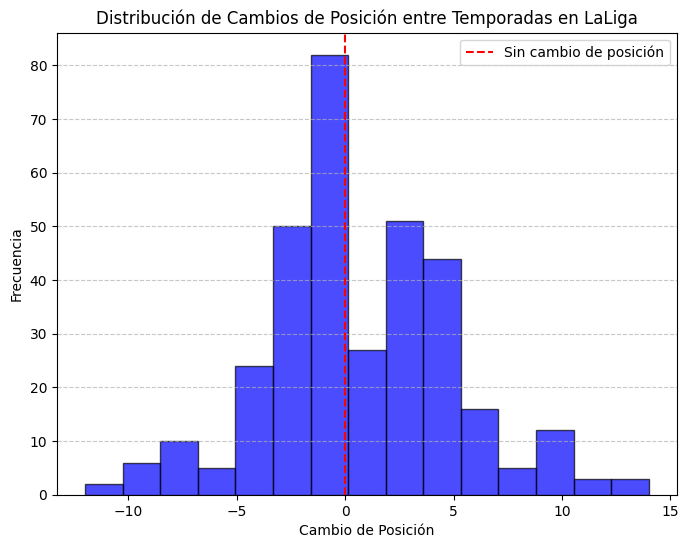

In [56]:
import matplotlib.pyplot as plt

# Calcular los cambios de posición entre temporadas
position_changes = []

# Iterar sobre todos los equipos
for team, positions in team_positions_dict.items():
    # Recorrer las temporadas y calcular el cambio de posición entre temporada i y temporada i+1
    for i in range(len(positions) - 1):  # Comparar temporada i con temporada i+1
        if positions[i] is not None and positions[i+1] is not None:  # Asegurarse de que ambas posiciones no sean NaN
            change = positions[i+1] - positions[i]  # Diferencia de posición
            position_changes.append(change)

# Crear el histograma
plt.figure(figsize=(8,6))
plt.hist(position_changes, bins=15, color="blue", edgecolor="black", alpha=0.7)
plt.xlabel("Cambio de Posición")
plt.ylabel("Frecuencia")
plt.title("Distribución de Cambios de Posición entre Temporadas en LaLiga")
plt.axvline(0, color='red', linestyle='--', label="Sin cambio de posición")  # Línea de referencia en 0
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


5. Cambio medio de posición en temporadas consecutivas

In [57]:
# Lista para almacenar los cambios de posición
position_changes = []

# Iterar sobre los equipos y calcular el cambio de posición entre temporadas consecutivas
for team, positions in team_positions_dict.items():
    for i in range(len(positions) - 1):  # Comparar temporada i con temporada i+1
        if positions[i] is not None and positions[i+1] is not None:  # Asegurarse de que no sean NaN
            change = abs(positions[i+1] - positions[i])  # Cambio absoluto de posición
            position_changes.append(change)

# Calcular la media de cambio de posición
mean_position_change = np.mean(position_changes)

print(f"El cambio promedio de posición entre temporadas es: {mean_position_change:.2f} posiciones")


El cambio promedio de posición entre temporadas es: 3.32 posiciones
